In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('scores_data.csv')

In [38]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [22]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [24]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


### 1) checking null values

In [142]:
df.isnull().sum()

Batch              0
User_ID            0
Score              0
Numerical_score    0
dtype: int64

### 2) checking for duplicates

In [145]:
df.duplicated().sum()

np.int64(0)

### 3) checking column names

In [144]:
df.columns

Index(['Batch', 'User_ID', 'Score', 'Numerical_score'], dtype='object')

In [40]:
df.columns = df.columns.str.strip()

In [146]:
df['Batch'].nunique()

3

### 4) Converting data types and changeing numreical values into float

In [46]:
df['Numerical_score'] = df['Score'].str.split('/').str[0].astype(int)

In [47]:
df.head()

,Batch,User_ID,Score,Numerical_score
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


## Visualization on the data

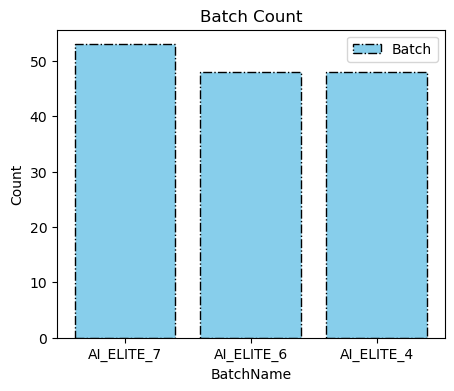

In [147]:
plt.figure(figsize = (5,4))
plt.bar(df['Batch'].value_counts().index,df['Batch'].value_counts().values,label = "Batch",color = 'skyblue',edgecolor = 'black',linestyle = '-.')
plt.title("Batch Count")
plt.xlabel('BatchName')
plt.ylabel('Count')
plt.legend()
plt.show()

In [148]:
score_frequencies = df['Numerical_score'].value_counts().sort_index()

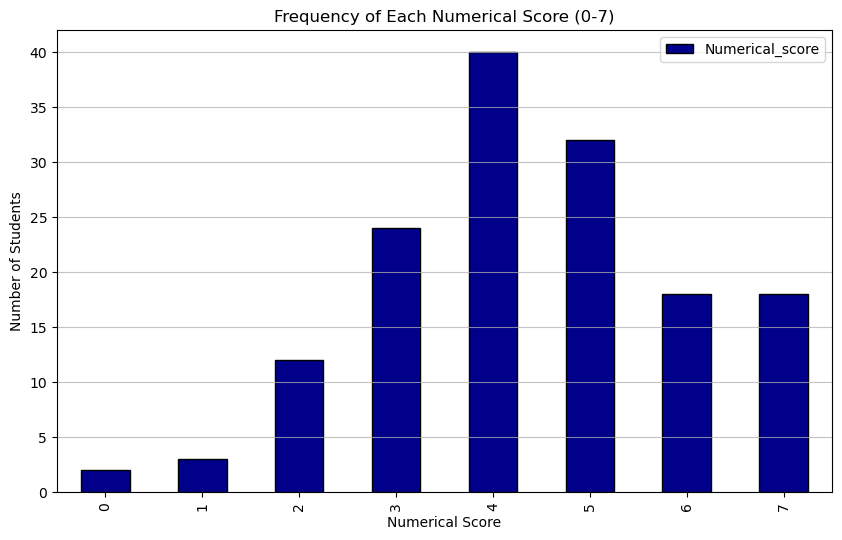

In [152]:
plt.figure(figsize=(10, 6))
score_frequencies.plot(kind='bar', color='darkblue', edgecolor='black',label = 'Numerical_score')
plt.title('Frequency of Each Numerical Score (0-7)')
plt.xlabel('Numerical Score')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


In [153]:
avg = df.groupby('Batch')['Numerical_score'].mean()

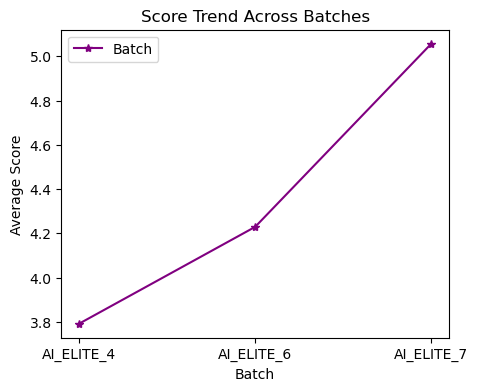

In [154]:
plt.figure(figsize=(5,4))
plt.plot(avg.index, avg.values,
         marker='*', linestyle='-',
         color='purple',label = 'Batch')

plt.xlabel('Batch')
plt.ylabel('Average Score')
plt.legend()
plt.title('Score Trend Across Batches')
plt.show()

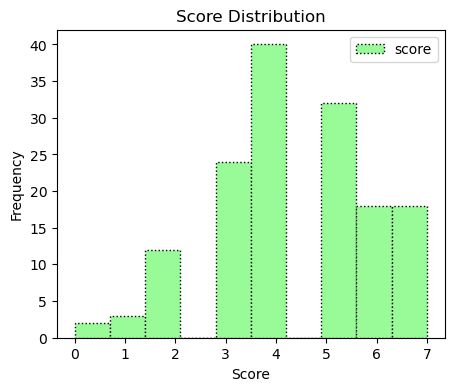

In [155]:
plt.figure(figsize=(5,4))
plt.hist(df['Numerical_score'],
         bins=10,
         color='palegreen',label = 'score',
         edgecolor='black',linestyle = ':')

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Score Distribution')
plt.legend()
plt.show()

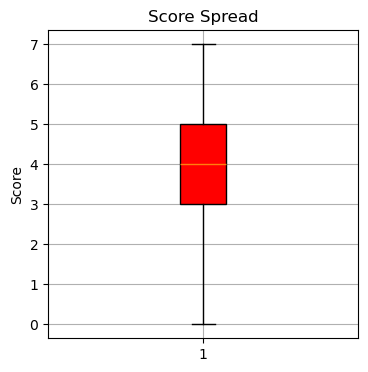

In [156]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Numerical_score'],
            patch_artist=True,
            boxprops=dict(facecolor='red'))

plt.ylabel('Score')
plt.title('Score Spread')
plt.grid()
plt.show()

In [157]:
df.head()

,Batch,User_ID,Score,Numerical_score
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


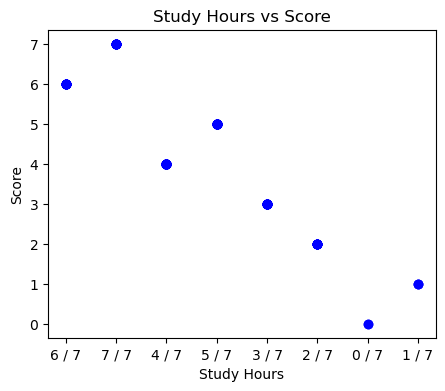

In [158]:
plt.figure(figsize=(5,4))
plt.scatter(df['Score'], df['Numerical_score'],
            color='blue')

plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Study Hours vs Score')
plt.show()

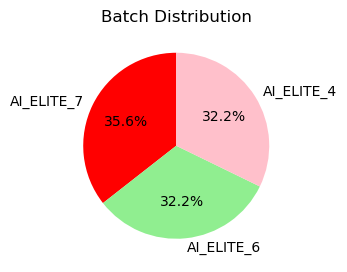

In [159]:
counts = df['Batch'].value_counts()

plt.figure(figsize=(3,4))
plt.pie(counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['red','lightgreen','pink'])

plt.title('Batch Distribution')
plt.show()

In [160]:
pd.crosstab(df['Batch'],df['Score'])

Score,0 / 7,1 / 7,2 / 7,3 / 7,4 / 7,5 / 7,6 / 7,7 / 7
Batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


In [161]:
pd.pivot_table(df,values = 'Numerical_score',
              index = 'Batch',
              aggfunc = ['mean','median','max'])

,mean,median,max
,Numerical_score,Numerical_score,Numerical_score
Batch,,,
AI_ELITE_4,3.791667,4.0,7
AI_ELITE_6,4.229167,4.0,7
AI_ELITE_7,5.056604,5.0,7
